In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [ 105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

### GOAL HERE:

find knn regressor to predict music genre from bpm with feature being music duration. Play around with K to get highest accuracy.

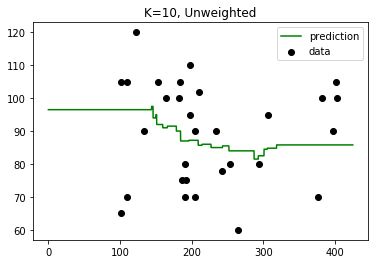

In [19]:
from sklearn import neighbors

# Build our model - focusing on duration only!!!!!

knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 425, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

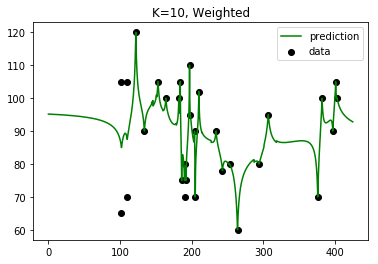

In [20]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')

X = pd.DataFrame(music.duration)
Y = music.bpm

knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 425, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [21]:
# And now to cross validate

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=20)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=20)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -19.76 (+/- 108.84)
Weighted Accuracy: -13.91 (+/- 70.65)


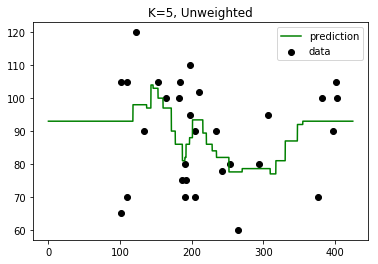

In [16]:
# trying again with k=5

knn = neighbors.KNeighborsRegressor(n_neighbors=5)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 425, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=5, Unweighted')
plt.show()

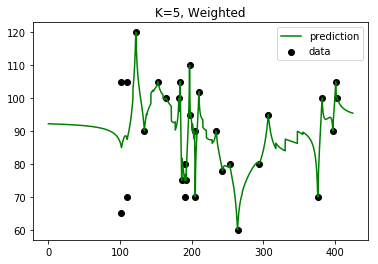

In [17]:
# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=5, weights='distance')

knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 425, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=5, Weighted')
plt.show()

In [18]:
# And now to cross validate

from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=20)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=20)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -13.34 (+/- 62.79)
Weighted Accuracy: -12.98 (+/- 65.03)


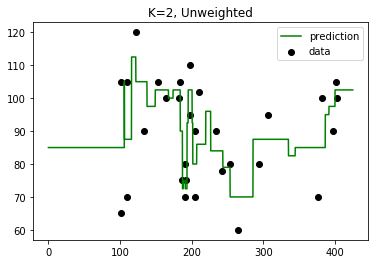

In [27]:
# doing one more with k=2
# (Using k=1 would not change effect of weighting here, and I want to incorporate
# some weighting analysis)

knn = neighbors.KNeighborsRegressor(n_neighbors=2)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 425, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=2, Unweighted')
plt.show()


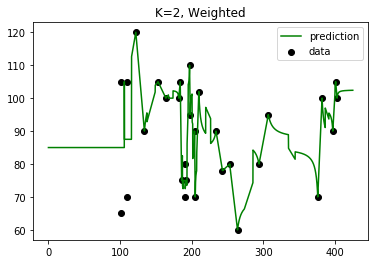

In [28]:

knn_w = neighbors.KNeighborsRegressor(n_neighbors=2, weights='distance')

knn_w.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 425, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=2, Weighted')
plt.show()

In [29]:
# super overfit, but hey, whatchya gonna do about it...

# And now to cross validate

score = cross_val_score(knn, X, Y, cv=20)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=20)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -17.98 (+/- 106.69)
Weighted Accuracy: -20.11 (+/- 117.26)


In [30]:
# okay, okay, one more - this time with high k value
music.bpm.count() # just wanna check my upper limit...

30

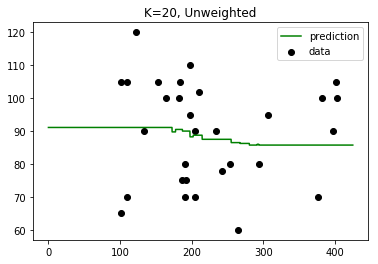

In [31]:
# doing one more with k=20

knn = neighbors.KNeighborsRegressor(n_neighbors=20)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 425, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=20, Unweighted')
plt.show()


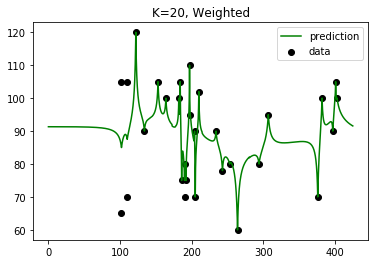

In [32]:
knn_w = neighbors.KNeighborsRegressor(n_neighbors=20, weights='distance')

knn_w.fit(X, Y)

T = np.arange(0, 425, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=20, Weighted')
plt.show()

In [33]:
# The weighting doesn't help here - perhaps not enough data points to make a difference?

# now to cross-validate...

score = cross_val_score(knn, X, Y, cv=20)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=20)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -18.85 (+/- 92.27)
Weighted Accuracy: -13.72 (+/- 66.28)


In [ ]:
# All high variance, so meh.